In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train)
print(test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [45]:
for column in train.columns:
    if train[column].dtype=='object':
        train[column].fillna(train[column].mode()[0],inplace=True)
        if column in test.columns:
            test[column].fillna(test[column].mode()[0],inplace=True)           
    else:
        train[column].fillna(train[column].mean(),inplace=True)
        if column in test.columns:
            test[column].fillna(test[column].mean(),inplace=True)           
features=['GrLivArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']           
xtrain=train[['GrLivArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']]
ytrain=train['SalePrice']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

C:\Users\Soft\AppData\Local\Temp\ipykernel_6896\1227224769.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].mean(),inplace=True)
C:\Users\Soft\AppData\Local\Temp\ipykernel_6896\1227224769.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

LinearRegression()

In [46]:
y_pred=model.predict(x_test)


In [47]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE',mae)
print('R2:',r2)

MSE: 2809126045.9448595
MAE 36073.13878245481
R2: 0.6337670693441046


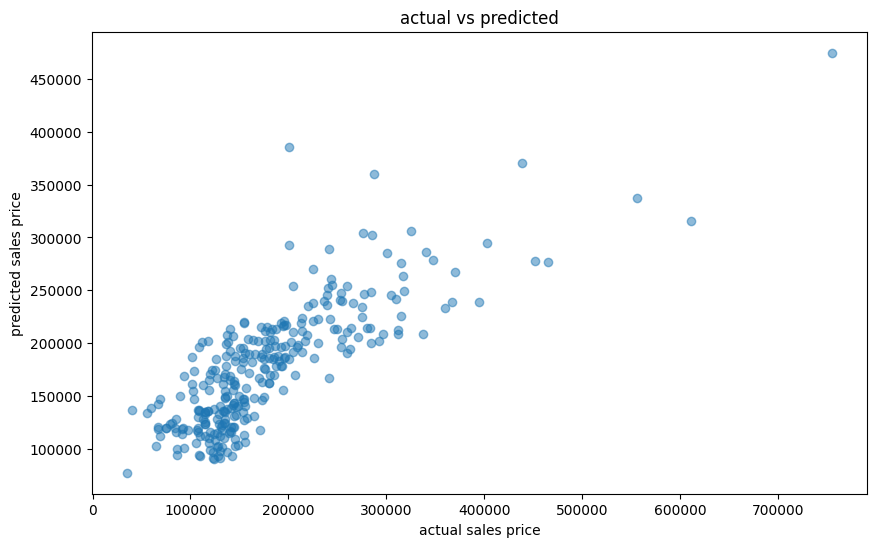

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('actual sales price')
plt.ylabel('predicted sales price')
plt.title('actual vs predicted')
plt.show()

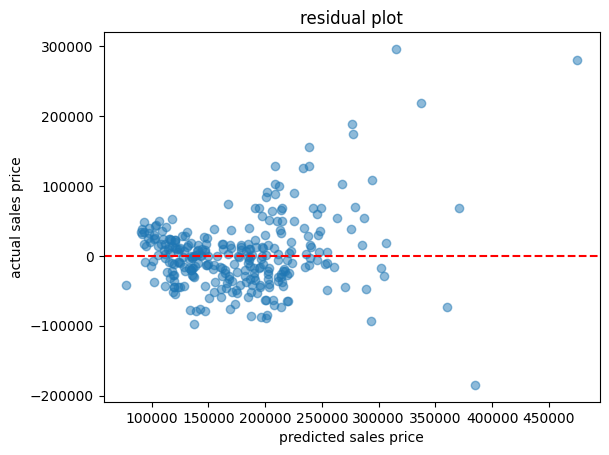

In [49]:
residual=y_test-y_pred
plt.scatter(y_pred,residual,alpha=0.5)
plt.xlabel('predicted sales price')
plt.ylabel('actual sales price')
plt.title('residual plot')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [50]:
df=pd.DataFrame({'GrLivArea':[2000],'BedroomAbvGr':[3],'FullBath':[2],'HalfBath':[1],'TotRmsAbvGrd':[7]})
p=model.predict(df)
print(f"predicted price is {p[0]}")

predicted price is 240896.2838034704


In [51]:
x_test=test[features]
tp=model.predict(x_test)
sub=pd.DataFrame({'Id':test['Id'],'SalePrice':tp})
sub.to_csv('submision.csv',index=False)